In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Завантаження даних
file_path = 'NationalNames.csv'  # Замініть на шлях до вашого файлу
data = pd.read_csv(file_path)

In [3]:
# 1. Вивести перші 8 рядків
print("Перші 8 рядків:")
print(data.head(8))

Перші 8 рядків:
   Id       Name  Year Gender  Count
0   1       Mary  1880      F   7065
1   2       Anna  1880      F   2604
2   3       Emma  1880      F   2003
3   4  Elizabeth  1880      F   1939
4   5     Minnie  1880      F   1746
5   6   Margaret  1880      F   1578
6   7        Ida  1880      F   1472
7   8      Alice  1880      F   1414


In [4]:
# 3. Отримати імена стовпців
print("\nІмена стовпців:")
print(data.columns.tolist())


Імена стовпців:
['Id', 'Name', 'Year', 'Gender', 'Count']


In [5]:
# 6. Кількість унікальних жіночих та чоловічих імен
unique_female_names = data[data['Gender'] == 'F']['Name'].nunique()
unique_male_names = data[data['Gender'] == 'M']['Name'].nunique()
print(f"\nКількість унікальних жіночих імен: {unique_female_names}")
print(f"Кількість унікальних чоловічих імен: {unique_male_names}")


Кількість унікальних жіночих імен: 64911
Кількість унікальних чоловічих імен: 39199


In [6]:
# 7. 5 найпопулярніших чоловічих імен у 2010 році
popular_male_2010 = (data[(data['Year'] == 2010) & (data['Gender'] == 'M')]
                     .groupby('Name')['Count']
                     .sum()
                     .nlargest(5))
print("\n5 найпопулярніших чоловічих імен у 2010 році:")
print(popular_male_2010)


5 найпопулярніших чоловічих імен у 2010 році:
Name
Jacob      22082
Ethan      17985
Michael    17308
Jayden     17152
William    17030
Name: Count, dtype: int64


In [7]:
# 8. Найпопулярніше ім’я за всі роки
most_popular_name = data.loc[data['Count'].idxmax()]
print("\nНайпопулярніше ім’я за всі роки:")
print(most_popular_name)


Найпопулярніше ім’я за всі роки:
Id        431053
Name       Linda
Year        1947
Gender         F
Count      99680
Name: 431052, dtype: object


In [8]:
# 12. Найпопулярніше ім’я у році з найбільшою кількістю унікальних імен
unique_names_per_year = data.groupby('Year')['Name'].nunique()
year_most_unique_names = unique_names_per_year.idxmax()
most_popular_in_year = data[data['Year'] == year_most_unique_names].sort_values(by='Count', ascending=False).iloc[0]
print(f"\nРік із найбільшою кількістю унікальних імен: {year_most_unique_names}")
print("Найпопулярніше ім’я у цьому році:")
print(most_popular_in_year)


Рік із найбільшою кількістю унікальних імен: 2008
Найпопулярніше ім’я у цьому році:
Id        1608303
Name        Jacob
Year         2008
Gender          M
Count       22568
Name: 1608302, dtype: object


In [9]:
# 13. Рік, коли ім’я “Jacob” було найпопулярнішим серед жіночих імен
jacob_female = data[(data['Name'] == 'Jacob') & (data['Gender'] == 'F')]
if not jacob_female.empty:
    year_jacob_female = jacob_female.loc[jacob_female['Count'].idxmax()]
    print("\nРік, коли ім’я 'Jacob' було найпопулярнішим серед жіночих імен:")
    print(year_jacob_female['Year'])
else:
    print("\nІм’я 'Jacob' не було популярним серед жіночих імен.")


Рік, коли ім’я 'Jacob' було найпопулярнішим серед жіночих імен:
2004


In [10]:
# 14. Рік із найбільшою кількістю гендерно нейтральних імен
neutral_names = data.groupby(['Year', 'Name'])['Gender'].nunique()
neutral_years = neutral_names[neutral_names > 1].reset_index().groupby('Year')['Name'].count()
most_neutral_year = neutral_years.idxmax()
print(f"\nРік із найбільшою кількістю гендерно нейтральних імен: {most_neutral_year}")


Рік із найбільшою кількістю гендерно нейтральних імен: 2008


In [11]:
# 15. Загальна кількість народжень за рік
births_per_year = data.groupby('Year')['Count'].sum()
print("\nЗагальна кількість народжень за рік:")
print(births_per_year)


Загальна кількість народжень за рік:
Year
1880     201484
1881     192699
1882     221538
1883     216950
1884     243467
         ...   
2010    3686589
2011    3646730
2012    3643336
2013    3626802
2014    3670151
Name: Count, Length: 135, dtype: int64


In [12]:
# 16. Рік, коли народилося найбільше дітей
year_most_births = births_per_year.idxmax()
print(f"\nРік, коли народилося найбільше дітей: {year_most_births}")


Рік, коли народилося найбільше дітей: 1957


In [13]:
# 17. Кількість дівчаток та хлопчиків, які народились кожного року
gender_counts_per_year = data.groupby(['Year', 'Gender'])['Count'].sum().unstack()
print("\nКількість дівчаток та хлопчиків за роками:")
print(gender_counts_per_year)


Кількість дівчаток та хлопчиків за роками:
Gender        F        M
Year                    
1880      90993   110491
1881      91954   100745
1882     107850   113688
1883     112321   104629
1884     129022   114445
...         ...      ...
2010    1772738  1913851
2011    1753500  1893230
2012    1753922  1889414
2013    1745339  1881463
2014    1768775  1901376

[135 rows x 2 columns]


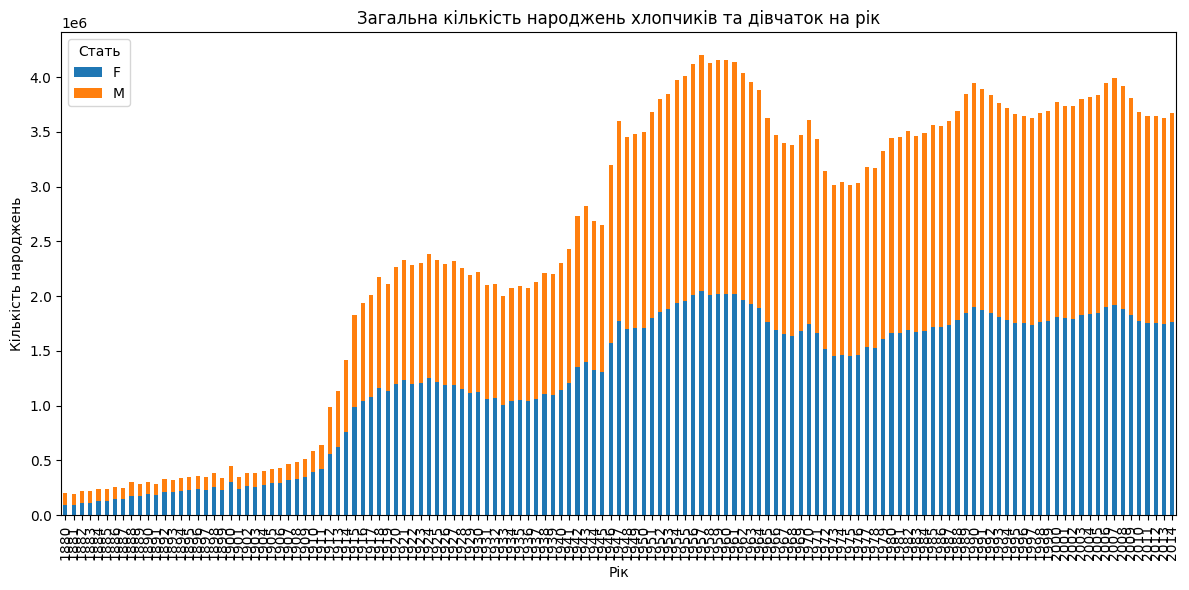

In [14]:
# 19. Графік загальної кількості народжень хлопчиків та дівчаток на рік
gender_counts_per_year.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Загальна кількість народжень хлопчиків та дівчаток на рік")
plt.xlabel("Рік")
plt.ylabel("Кількість народжень")
plt.legend(title="Стать")
plt.tight_layout()
plt.show()

In [15]:
# 20. Кількість гендерно нейтральних імен
total_neutral_names = neutral_names[neutral_names > 1].reset_index()['Name'].nunique()
print(f"\nКількість гендерно нейтральних імен: {total_neutral_names}")


Кількість гендерно нейтральних імен: 8914


In [16]:
# 22. Кількість років спостережень
years_observed = data['Year'].nunique()
print(f"\nКількість років спостережень: {years_observed}")


Кількість років спостережень: 135


In [17]:
# 24. Найпопулярніше серед непопулярних імен
threshold = 10  # Імена з кількістю народжень менше за threshold
unpopular_names = data[data['Count'] < threshold]
most_popular_unpopular = unpopular_names.loc[unpopular_names['Count'].idxmax()]
print("\nНайпопулярніше серед непопулярних імен:")
print(most_popular_unpopular)


Найпопулярніше серед непопулярних імен:
Id          580
Name      Adela
Year       1880
Gender        F
Count         9
Name: 579, dtype: object


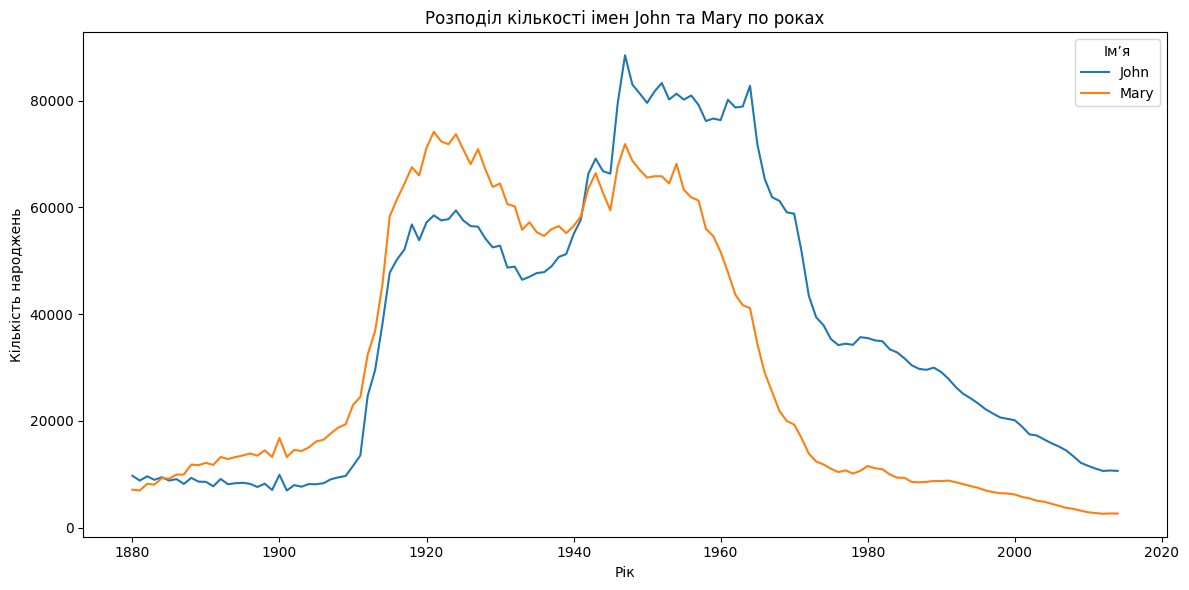

In [18]:
# 25. Графіки розподілу кількості імен John та Mary по роках (без статі)
john_mary = data[data['Name'].isin(['John', 'Mary'])].groupby(['Year', 'Name'])['Count'].sum().unstack()
john_mary.plot(figsize=(12, 6))
plt.title("Розподіл кількості імен John та Mary по роках")
plt.xlabel("Рік")
plt.ylabel("Кількість народжень")
plt.legend(title="Ім’я")
plt.tight_layout()
plt.show()

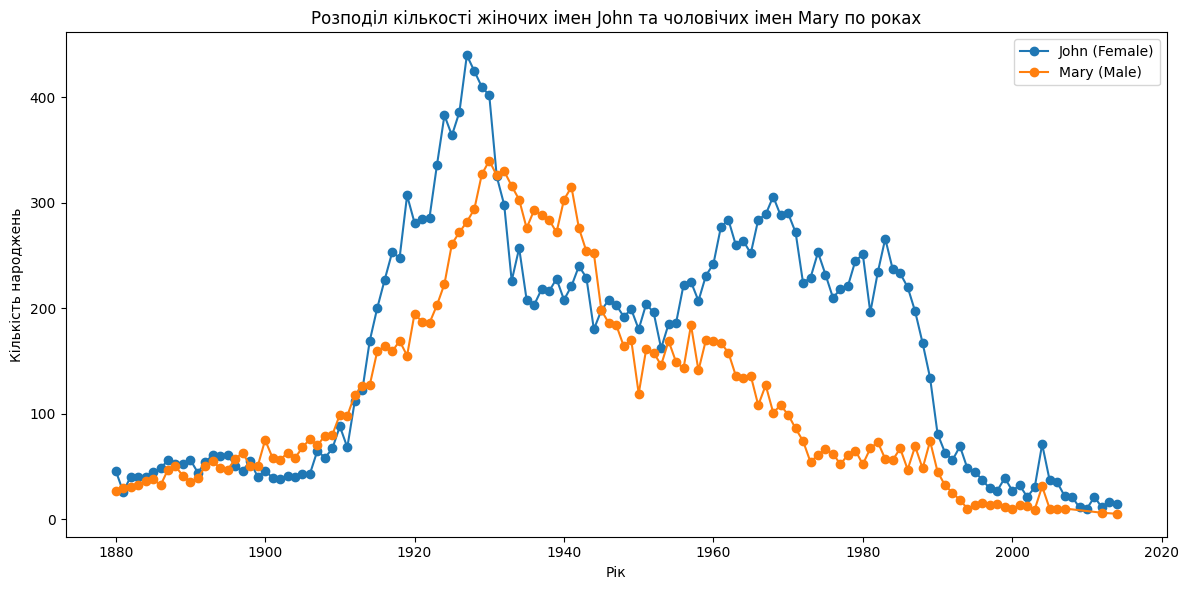

In [19]:
# 26. Розподіл кількості жіночих імен John та чоловічих імен Mary
john_female = data[(data['Name'] == 'John') & (data['Gender'] == 'F')].groupby('Year')['Count'].sum()
mary_male = data[(data['Name'] == 'Mary') & (data['Gender'] == 'M')].groupby('Year')['Count'].sum()

plt.figure(figsize=(12, 6))
plt.plot(john_female.index, john_female.values, label='John (Female)', marker='o')
plt.plot(mary_male.index, mary_male.values, label='Mary (Male)', marker='o')
plt.title("Розподіл кількості жіночих імен John та чоловічих імен Mary по роках")
plt.xlabel("Рік")
plt.ylabel("Кількість народжень")
plt.legend()
plt.tight_layout()
plt.show()

In [20]:
# 27. Найпопулярніші імена в кожному році
most_popular_names_per_year = data.loc[data.groupby('Year')['Count'].idxmax()]
print("\nНайпопулярніші імена в кожному році:")
print(most_popular_names_per_year[['Year', 'Name', 'Gender', 'Count']])


Найпопулярніші імена в кожному році:
         Year      Name Gender  Count
942      1880      John      M   9655
2938     1881      John      M   8769
4963     1882      John      M   9557
7116     1883      John      M   8894
9318     1884      John      M   9388
...       ...       ...    ...    ...
1657592  2010  Isabella      F  22883
1691633  2011    Sophia      F  21816
1725502  2012    Sophia      F  22267
1759186  2013    Sophia      F  21147
1792389  2014      Emma      F  20799

[135 rows x 4 columns]
